# Madineni Aashika

## **Prediction using Supervised ML**

In [106]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [112]:
# checking for null value
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [113]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [114]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [115]:
#checking the length of data
len(s_data)

25

### Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

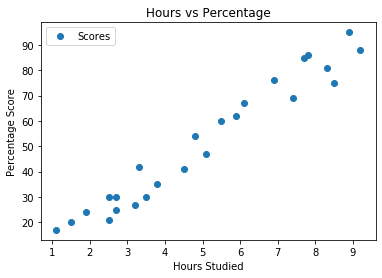

In [118]:
# Plotting the distribution
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## **Hence, we see that there is a positive linear relation between the number of hours studied and percentage of score.**

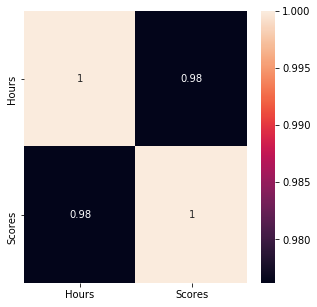

In [122]:
#correlation plot
plt.figure(figsize=(5,5))
correlation_matrix = s_data.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

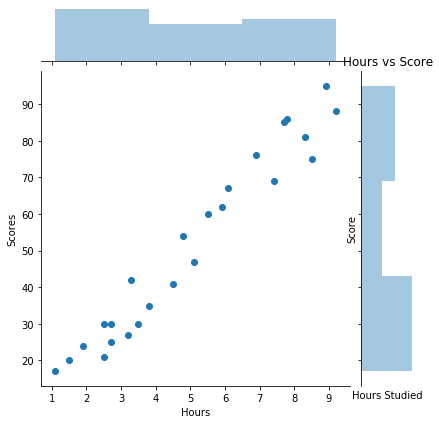

In [139]:
#data visualization
sns.jointplot(x='Hours',y='Scores',data=s_data)
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score') 
plt.show()

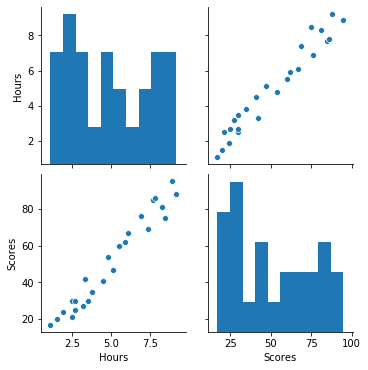

In [124]:
sns.pairplot(s_data)

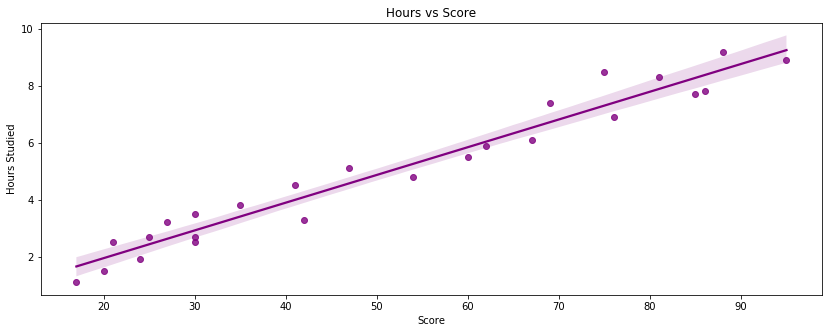

In [125]:
plt.figure(figsize=(14,5))
sns.regplot(s_data['Scores'],s_data['Hours'],color='purple')
plt.title('Hours vs Score')  
plt.ylabel('Hours Studied')  
plt.xlabel('Score') 
plt.show()

# Preparing the data
Dividing the data into "attributes" (inputs) and "labels" (outputs).

In [126]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, -1].values  
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

# **Spliting this data into training and test sets**

In [127]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.222, random_state=96) 

# **Training the Algorithm**

In [128]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


In [86]:
print(regressor.coef_)

[9.93408203]


In [87]:
print(regressor.intercept_)

1.7704178659539451


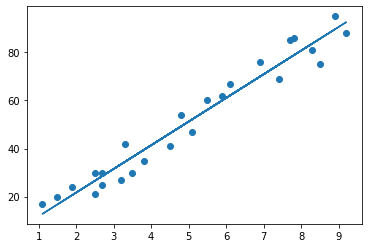

In [129]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

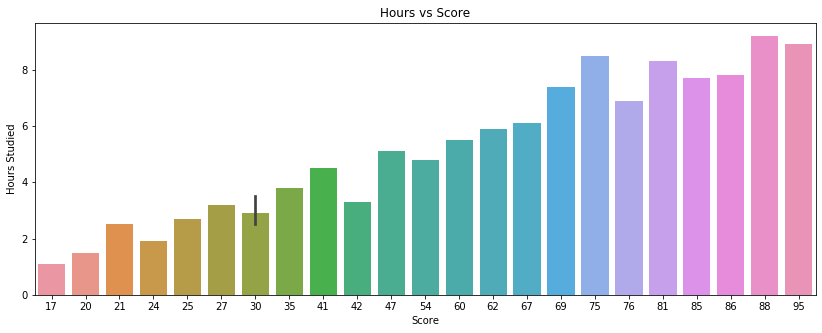

In [130]:
plt.figure(figsize=(14,5))
sns.barplot(s_data['Scores'],s_data['Hours'])
plt.title('Hours vs Score')  
plt.ylabel('Hours Studied')  
plt.xlabel('Score') 
plt.show()

## **Making Predictions**


In [131]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[5.5]
 [8.3]
 [2.5]
 [2.5]
 [1.9]
 [5.9]]


In [132]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,60,56.109403
1,81,83.664616
2,21,26.585960
3,30,26.585960
4,24,20.681272
5,62,60.045862


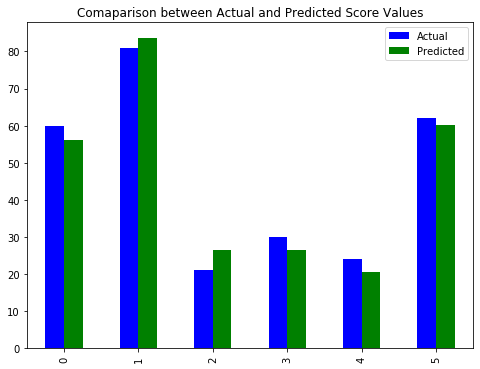

In [133]:

df.plot(kind='bar',figsize=(8,6), color=["b", "g"], title= "Comaparison between Actual and Predicted Score Values")

In [134]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.01370652589975


# **Evaluating the model**



In [135]:
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_pred))
print("MAE:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2) 

MAE: 3.471346632602503
RMSE: 3.649843785623521
R-Square: 0.9737193693697739


In [136]:
Accu=regressor.score(X_test,y_test)*100
print('Accuracy is {} '.format(Accu))

Accuracy is 97.37193693697739 


# **The accuracy of the model is 97.37%. The mean absolute error is 3.47% and Root Mean Squared error of 3.64.**

In [138]:
User_input = float(input())
print('Hours: {}'.format(User_input))
print('Predicted Score{}'.format(regressor.predict([[User_input]])))

9.2
Hours: 9.2
Predicted Score[92.52164914]
